In [1]:
import pandas as pd
from rdkit import Chem
import seaborn as sns
from tqdm import tqdm
import numpy as np

In [2]:
tqdm.pandas()


In [3]:
chembl = pd.read_csv("ChEMBL/ChEMBL289.csv", sep=";")

/tmp/ipykernel_65817/1909509050.py:1: DtypeWarning: Columns (32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  chembl = pd.read_csv("ChEMBL/ChEMBL289.csv", sep=";")


In [4]:
chembl

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value
0,CHEMBL1287953,NaN,NaN,536.04,2.0,5.77,2,CC(C)(C(=O)Nc1ccc(N2CCC3(CCN(CC4CC4)C3)CC2)c(C...,INH,'>',...,CHEMBL1287792,1,Scientific Literature,Bioorg Med Chem Lett,2010.0,NaN,NaN,NaN,NaN,10.000000
1,CHEMBL256961,NaN,NaN,327.82,0.0,3.21,rac-46,Clc1ccc2ncc(-c3cccc(NC4CCCNC4)n3)n2c1,Inhibition,'=',...,CHEMBL1145577,1,Scientific Literature,Bioorg Med Chem Lett,2008.0,NaN,NaN,NaN,NaN,1.800000
2,CHEMBL256989,NaN,NaN,499.44,0.0,4.57,10,O=C(Cn1c(=O)cnc2cc(Cl)c(Cl)cc21)N1CCCC(c2ccccc...,IC50,'=',...,CHEMBL1145579,1,Scientific Literature,Bioorg Med Chem Lett,2008.0,NaN,NaN,NaN,NaN,2.900000
3,CHEMBL1269022,NaN,NaN,308.37,0.0,3.25,SID4253263,S=C(Nc1ccc2cn[nH]c2c1)Nc1ccc2cn[nH]c2c1,AC50,'=',...,CHEMBL1201862,7,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,1.995262
4,CHEMBL1586264,NaN,NaN,353.49,0.0,3.22,SID17413171,CC(C)(C)NS(=O)(=O)c1ccc(NC(=O)NC2CCCCC2)cc1,AC50,'=',...,CHEMBL1201862,7,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN,17.782794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34249,CHEMBL490,PAROXETINE,4.0,329.37,0.0,3.33,Paroxetin,Fc1ccc([C@@H]2CCNC[C@H]2COc2ccc3c(c2)OCO3)cc1,IC50,'=',...,CHEMBL5390273,1,Scientific Literature,J Med Chem,2023.0,NaN,TIME = 0.5833 hr,INHIBITOR,NaN,0.380000
34250,CHEMBL288441,BOSUTINIB,4.0,530.46,2.0,5.19,3,COc1cc(Nc2c(C#N)cnc3cc(OCCCN4CCN(C)CC4)c(OC)cc...,IC50,NaN,...,CHEMBL5370690,1,Scientific Literature,ACS Med Chem Lett,2023.0,NaN,TIME = 0.08333 hr,NaN,NaN,NaN
34251,CHEMBL75,NaN,NaN,531.44,1.0,4.21,Ketoconazole,CC(=O)N1CCN(c2ccc(OC[C@H]3CO[C@](Cn4ccnc4)(c4c...,Activity,'>',...,CHEMBL4823255,1,Scientific Literature,Eur J Med Chem,2021.0,NaN,Dose = 10.0 microM,NaN,NaN,100.000000
34252,CHEMBL376488,BEDAQUILINE,4.0,555.52,2.0,7.13,"1; TMC207,R207910",COc1nc2ccc(Br)cc2cc1[C@@H](c1ccccc1)[C@@](O)(C...,IC50,'>',...,CHEMBL5113423,1,Scientific Literature,Bioorg Med Chem Lett,2022.0,NaN,NaN,NaN,NaN,10.000000


In [5]:
chembl.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties',
       'Action Type', 'Standard Text Value', 'V

In [6]:
chembl["Data Validity Comment"].value_counts()

Data Validity Comment
Outside typical range            197
Potential transcription error      3
Name: count, dtype: int64

In [7]:
chembl["Action Type"].value_counts()

Action Type
INHIBITOR        586
SUBSTRATE         35
DEGRADER           8
BINDING AGENT      3
Name: count, dtype: int64

In [8]:
chembl["Standard Units"].value_counts()

Standard Units
nM               16210
%                 3580
uM                 340
hr                  16
pmol/min            11
mL.min-1.g-1        11
uL/min              11
nmol/min            10
min-1                9
1/min                7
10'-4/min            4
%/min/pmol           4
min                  4
10'3ml/min           3
/min                 3
ug.mL-1              2
mM                   2
nmol                 2
mL/min.umol          2
ul.min.nmol-1        1
pmol.min.mg-1        1
Name: count, dtype: int64

In [9]:
chembl["Standard Type"].value_counts()

Standard Type
AC50                          17143
IC50                           7694
Potency                        3649
Inhibition                     3187
Ki                             1056
Activity                        535
INH                             291
Drug metabolism                 188
FC                              151
TDI                             100
Km                               35
Vmax                             32
Compound recovery                29
EC50                             26
Ratio IC50                       25
CL                               23
T1/2                             16
IC20                             13
Kinact                           11
Stability                        11
IC90                              8
IC                                7
Ratio                             4
PPB                               4
Drug uptake                       3
Vmax/Km                           3
PB                                2
Control of P-4

<Axes: xlabel='pChEMBL Value', ylabel='Count'>

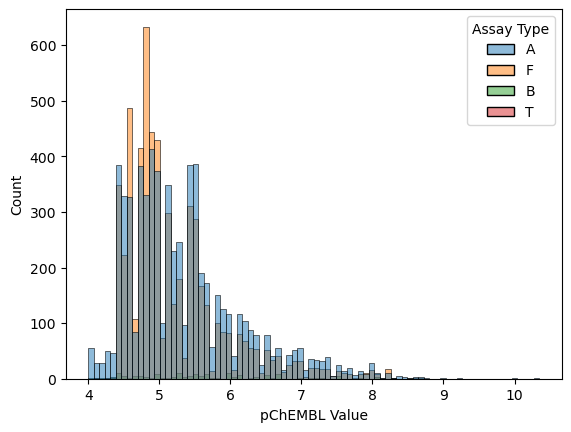

In [10]:
sns.histplot(data=chembl, x="pChEMBL Value", hue="Assay Type")

<Axes: xlabel='Action Type', ylabel='count'>

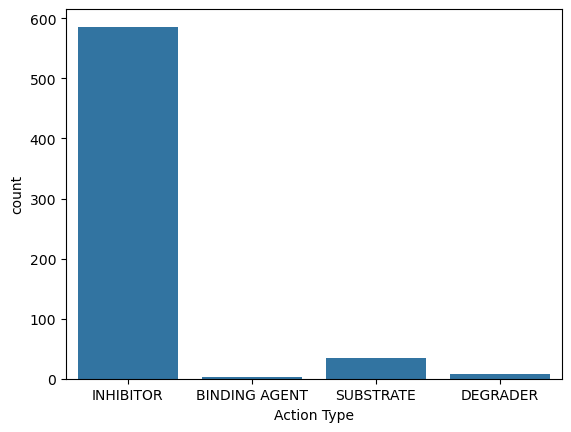

In [11]:
sns.countplot(data=chembl, x="Action Type")

In [12]:
n_mol = chembl["Molecule ChEMBL ID"].nunique()
n_mol

27253

In [13]:
n_assays = chembl["Assay ChEMBL ID"].nunique()
n_assays

3129

In [14]:

# from Pat Walters method
def standardize_smiles(smiles):
    try:
        # follows the steps in
        # https://github.com/greglandrum/RSC_OpenScience_Standardization_202104/blob/main/MolStandardize%20pieces.ipynb
        # as described **excellently** (by Greg) in
        # https://www.youtube.com/watch?v=eWTApNX8dJQ
        mol = Chem.MolFromSmiles(smiles)
    
        # removeHs, disconnect metal atoms, normalize the molecule, reionize the molecule
        clean_mol = rdMolStandardize.Cleanup(mol)
    
        # if many fragments, get the "parent" (the actual mol we are interested in) 
        parent_clean_mol = rdMolStandardize.FragmentParent(clean_mol)
    
        # try to neutralize molecule
        uncharger = rdMolStandardize.Uncharger()  # annoying, but necessary as no convenience method exists
        uncharged_parent_clean_mol = uncharger.uncharge(parent_clean_mol)
    
        # note that no attempt is made at reionization at this step
        # nor at ionization at some pH (rdkit has no pKa caculator)
        # the main aim to represent all molecules from different sources
        # in a (single) standard way, for use in ML, catalogue, etc.
    
        te = rdMolStandardize.TautomerEnumerator()  # idem
        taut_uncharged_parent_clean_mol = te.Canonicalize(uncharged_parent_clean_mol)
    
        return Chem.MolToSmiles(taut_uncharged_parent_clean_mol)
    except:
        return pd.NA

In [15]:
# standardisation of SMILES
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.rdBase import BlockLogs
import mols2grid

In [16]:

with BlockLogs():
    chembl["CANONICAL_SMILES"] = chembl["Smiles"].progress_apply(lambda x: standardize_smiles(x))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34254/34254 [03:54<00:00, 146.05it/s]


In [17]:
def smi_to_inchikey(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        return Chem.MolToInchiKey(mol)
    except:
        return pd.NA

In [18]:
# compute inchikeys
with BlockLogs():
    chembl["INCHIKEY"] = chembl["CANONICAL_SMILES"].progress_apply(lambda x: smi_to_inchikey(x))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34254/34254 [00:09<00:00, 3780.10it/s]


In [19]:
substrates = chembl[chembl["Action Type"] == "SUBSTRATE"]

In [69]:
substrates.INCHIKEY.nunique()

35

In [71]:
len(substrates.INCHIKEY)

35

In [76]:
# now clean up 
keep_cols = ["CANONICAL_SMILES", "INCHIKEY", "Molecule Name", "Action Type"]

In [77]:
clean_active = substrates[keep_cols]
clean_active.rename(columns={"assay_count":"appears_in_N_ChEMBL_assays", "Molecule Name": "common_name", "Action Type": "action_type"}, inplace=True)
clean_active_sorted = clean_active.sort_values(["common_name", "action_type"], ascending=[False, False]) # keep the ones with names if possible
clean_deduped = clean_active_sorted.drop_duplicates(subset="INCHIKEY", keep="first")


/tmp/ipykernel_65817/1475071475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_active.rename(columns={"assay_count":"appears_in_N_ChEMBL_assays", "Molecule Name": "common_name", "Action Type": "action_type"}, inplace=True)


In [78]:
clean_active.head()

,CANONICAL_SMILES,INCHIKEY,common_name,action_type
2523,CNCC[C@H](Oc1cccc2ccccc12)c1cccs1,ZEUITGRIYCTCEM-KRWDZBQOSA-N,DULOXETINE,SUBSTRATE
2524,Cc1cccc(C)c1OCC(C)N,VLPIATFUUWWMKC-UHFFFAOYSA-N,MEXILETINE,SUBSTRATE
2799,CNCC[C@@H](Oc1ccccc1C)c1ccccc1,VHGCDTVCOLNTBX-QGZVFWFLSA-N,ATOMOXETINE,SUBSTRATE
2895,CN(C)CCC(c1ccc(Cl)cc1)c1ccccn1,SOYKEARSMXGVTM-UHFFFAOYSA-N,DEXCHLORPHENIRAMINE,SUBSTRATE
2896,CC(C)NC[C@@H](O)COc1cccc2ccccc12,AQHHHDLHHXJYJD-CQSZACIVSA-N,DEXPROPRANOLOL,SUBSTRATE


In [53]:
clean_deduped["action_type"].value_counts()

action_type
INHIBITOR    79
Name: count, dtype: int64

In [83]:
clean_deduped["action_type"] = "substrate"

In [84]:
clean_deduped["action_type"].value_counts()

action_type
substrate    35
Name: count, dtype: int64

In [85]:
clean_deduped["dataset"] = "ChEMBL_curated"
clean_deduped["active"] = True

In [86]:
clean_deduped.to_csv("processed/chembl_active.csv", index=False)